# ISOMAP

ISOMAP es un algoritmo de reducción de dimensiones que se enmarca en el contexto del *manifold learning*. Antes de poder explicar cómo y por qué funciona ISOMAP, debemos entender qué es un *manifold*.

Otros algorimos de reducción de dimensiones como, por ejemplo, PCA, asumen que los datos "a reducir" se encuentran dentro de un espacio euclídeo y que la distancia entre dos puntos será igual la longitud de la linea recta que conecte ambos puntos. Sin embargo, cuando estamos trabajando con conjuntos de datos significativamente y grandes, y más cuando estamos trabajando con un elevado número de dimensiones, se observa que esto no siempre es cierto.

Observemos la siguiente imagen:

![manifold](https://www.deeplearningitalia.com/wp-content/uploads/2017/11/i1-4.png)

Si asumimos un espacio euclídeo diremos que la distancia entre el punto *x1* y el punto *x2* es igual a la longitid de la linea azul. Sin embargo, si asumimos que los datos no se distribuyen por igual por todo el espacio, si no que la posición de estos está condicionado por un hiperplano, veremos que no es posible conectar de forma directa *x1* con *x2* si no que tenemos que recorrer todo el hiperplano para llegar de un punto a otro (línea roja). A este hiperplano, se le conoce como *manifold*.

ISOMAP, por tanto, asume que los datos "a reducir" se encuentran dentro de un *manifold* y busca reducir el número de dimensiones de los datos de forma no lineal.

El algoritmo de ISOMAP consta de 4 pasos:

1.   **Determinar el vecindario de cada punto**. Para cada punto del conjunto de datos se buscan los *k* puntos más cercanos. La métrica empleada para medir la distancia entre dos puntos es, generalmente, la distancia euclidea. El valor de *k* se corresponde con un hyperparémetro ISOMAP.

2.   **Construir el grafo de vecindarios**. Se construye un grafo conectado cada punto con su vecino más cercano. Para poder conectar un punto con otro es obligatorio que este pertenezca a su vecindarios. Si no, no se puede conectar. Si se seleccionar un valor bajo de *k* el grafo resultante puede ser no conexo.

3.   **Calcular el camino mínimo entre dos nodos**. Basandose en el grafo anterior, se determina el camino más corto que conecta dos nodos. Generalmente, este paso se realiza mediante el algoritmo de Dijkstra.

4.   **Aplicar escalado multidimensional (MDS)**. El paso anterior da como resultado lo que se conoce como matriz de distancias geodésicas. Sobre esta matriz se aplica [*multidimensional scaling (MDS)*](https://en.wikipedia.org/wiki/Multidimensional_scaling), un algoritmo que traduce las distancias entre multiples puntos en una configuración de puntos mapeada sobre un espacio cartesiano.

Una de las grandes ventajas que presenta ISOMAP es que el uso de MDS garantiza que las distancias existentes entre cada par de puntos del conjunto de datos original se conserva, lo mejor posible, en el nuevo espacio reducido generado. Esto lleva a que ISOMAP no se use sólo como un pre-procesamiento de los datos, si no que también se utiliza para visualizar en 1, 2 ó 3 dimensiones grandes conjuntos de datos *n*-dimensionales.

Ahora, veamos como funciona ISOMAP con un ejemplo.

### Pintando MNIST con ISOMAP

En este ejemplo vamos a comprobar como se representan los número de MNIST cuando empleamos ISOMAP para situarlos en 2 dimensiones.

Primero, cargamos las librerias:

In [0]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

Cargamos el datasets de MNIST. El parámetro `n_class` permite determinar cuántas clases quereremos cargar.

In [0]:
from sklearn import datasets
mnist = datasets.load_digits(n_class=10)

X = mnist.data
y = mnist.target

Aplicamos ISOMAP. Fijamos el número de vecinos (`n_neighbors`) a 30 y el número de componentes / dimensiones (`n_components`) a 2.

In [0]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=30, n_components=2)
X_projected = isomap.fit_transform(X)

Ahora pintamos el gráfico con MatPlotLib:

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

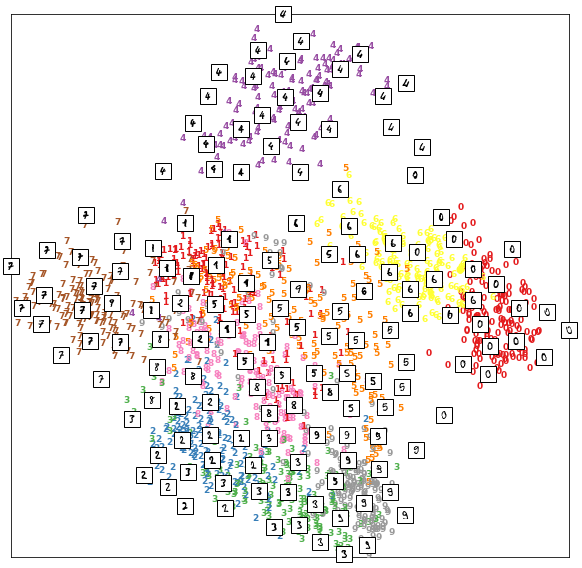

In [0]:
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_projected = (X_projected - x_min) / (x_max - x_min)

# definicion de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected.shape[0]):
    plt.text(X_projected[i, 0], X_projected[i, 1], str(y[i]),
              color=plt.cm.Set1(y[i] / 10.),
              fontdict={'weight': 'bold', 'size': 9})


# pintamos las imagenes de los numeros
shown_images = np.array([[1., 1.]])  # just something big
for i in range(X.shape[0]):
    dist = np.sum((X_projected[i] - shown_images) ** 2, 1)
    if np.min(dist) < 2e-3:
        # don't show points that are too close
        continue
    shown_images = np.r_[shown_images, [X_projected[i]]]
    imagebox = offsetbox.AnnotationBbox(
        offsetbox.OffsetImage(mnist.images[i], cmap=plt.cm.gray_r),
        X_projected[i])
    ax.add_artist(imagebox)

# desactivacion de las marcas de los ejes
plt.xticks([]), plt.yticks([])
